In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
# read in the csv file
bb = pd.read_csv('../project-05/LoanStats3d.csv', \
         keep_default_na = False, skiprows=1, usecols=['int_rate', \
        'dti', 'annual_inc', 'home_ownership', 'funded_amnt', 'term', 'loan_status'])

bb.columns

Index([u'funded_amnt', u'term', u'int_rate', u'home_ownership', u'annual_inc',
       u'loan_status', u'dti'],
      dtype='object')

In [45]:
bb.head(10)

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
0,35000,60 months,14.85%,MORTGAGE,110000,Current,17.06
1,10400,60 months,22.45%,MORTGAGE,104433,Fully Paid,25.37
2,20000,60 months,10.78%,MORTGAGE,63000,Current,10.78
3,25000,36 months,7.49%,MORTGAGE,109000,Fully Paid,26.02
4,28000,36 months,6.49%,MORTGAGE,92000,Current,21.6
5,18000,60 months,11.99%,MORTGAGE,112000,Fully Paid,8.68
6,16000,60 months,14.85%,MORTGAGE,48000,Current,33.18
7,23000,60 months,8.49%,RENT,64000,Current,18.28
8,8650,36 months,19.89%,RENT,55000,Fully Paid,25.49
9,9600,36 months,7.49%,MORTGAGE,60000,Current,22.44


In [46]:
print set(bb.loan_status)
print set(bb.home_ownership)

set(['', 'Late (31-120 days)', 'Default', 'Fully Paid', 'Current', 'Late (16-30 days)', 'Charged Off', 'In Grace Period'])
set(['', 'OWN', 'RENT', 'MORTGAGE', 'ANY'])


In [47]:
# remove blank rows
bb[bb['loan_status'] == '']
bb[bb['funded_amnt'] == '']
bb[bb['int_rate'] == '']
bb[bb['home_ownership'] == '']
bb[bb['annual_inc'] == '']
bb[bb['dti'] == '']

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
421095,,,,,,,
421096,,,,,,,


In [48]:
# Convert blanks to NaN's 

bb['loan_status'].replace('', np.nan, inplace=True)

In [49]:
bb.isnull().sum()

funded_amnt       0
term              0
int_rate          0
home_ownership    0
annual_inc        0
loan_status       2
dti               0
dtype: int64

In [50]:
# Drop NA's.

bb = bb.dropna()
bb.isnull().sum()

funded_amnt       0
term              0
int_rate          0
home_ownership    0
annual_inc        0
loan_status       0
dti               0
dtype: int64

In [51]:
len(bb[bb['loan_status'] == 'Current'])

303912

In [52]:
# set the non-current loans to equal bb
bb = bb[bb['loan_status'] != 'Current']
bb.head(1)

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
1,10400,60 months,22.45%,MORTGAGE,104433,Fully Paid,25.37


In [53]:
# Random sampling of 1000 data points

bb = bb.take(np.random.permutation(len(bb))[:1000])

In [54]:
# create column target by initilizing the column to all 0's, than set the loan
# statuses of the column into two different categories. Than count how many of each.
bb['target'] = [0]*len(bb)
bb['target'][bb['loan_status'] == 'In Grace Period'] = 1
bb['target'][bb['loan_status'] == 'Fully Paid'] = 1

del bb['loan_status']

bb['target'].value_counts()

/Users/Misha/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Misha/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    675
0    325
Name: target, dtype: int64

In [55]:
bb.head(1)

,funded_amnt,term,int_rate,home_ownership,annual_inc,dti,target
396946,35000,36 months,10.49%,MORTGAGE,135000,14.89,0


In [56]:
bb = bb.reset_index(drop = True)
bad = np.where(bb['target'] == 0)[0]
good = np.where(bb['target'] == 1)[0]

In [57]:
# Remove % sign for interest rate
bb.int_rate = [float(x[:-1]) if (type(x) == str) else x for x in bb['int_rate']]

In [58]:
# Remove non-numeric characters from term column
bb.term = [int(x[:-6]) if (type(x) == str) else x for x in bb['term']]

In [59]:
bb.dtypes

funded_amnt        object
term                int64
int_rate          float64
home_ownership     object
annual_inc         object
dti                object
target              int64
dtype: object

In [60]:
# convert column to integers
bb.funded_amnt = [int(x) if (type(x) == str) else x for x in bb['funded_amnt']]

In [61]:
# convert column to floats
bb.annual_inc  = [float(x) if (type(x) == str) else x for x in bb['annual_inc']]

In [62]:
# covert to float
bb.dti = [float(x) if (type(x) == str) else x for x in bb['dti']]

In [63]:
# Get dummies for Term

term = pd.get_dummies(bb.term)

term.columns = ["36 months", "60 months"]

In [64]:
# Add new term columns to table dataset.

bb = pd.concat([bb, term], axis = 1)

del bb["term"]
del bb['36 months']

In [65]:
# Create dummy variable for every category under home ownership

dumb_home = pd.get_dummies(bb.home_ownership)

dumb_home.head(2)

,MORTGAGE,OWN,RENT
0,1,0,0
1,1,0,0


In [66]:
# Add newly created dummy variable columns to dataset.

bb = pd.concat([bb, dumb_home], axis = 1)

del bb['home_ownership']
del bb['MORTGAGE']

In [67]:
bb.head(1)

,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT
0,35000,10.49,135000.0,14.89,0,0,0,0


In [68]:
bb.dtypes

funded_amnt      int64
int_rate       float64
annual_inc     float64
dti            float64
target           int64
60 months        uint8
OWN              uint8
RENT             uint8
dtype: object

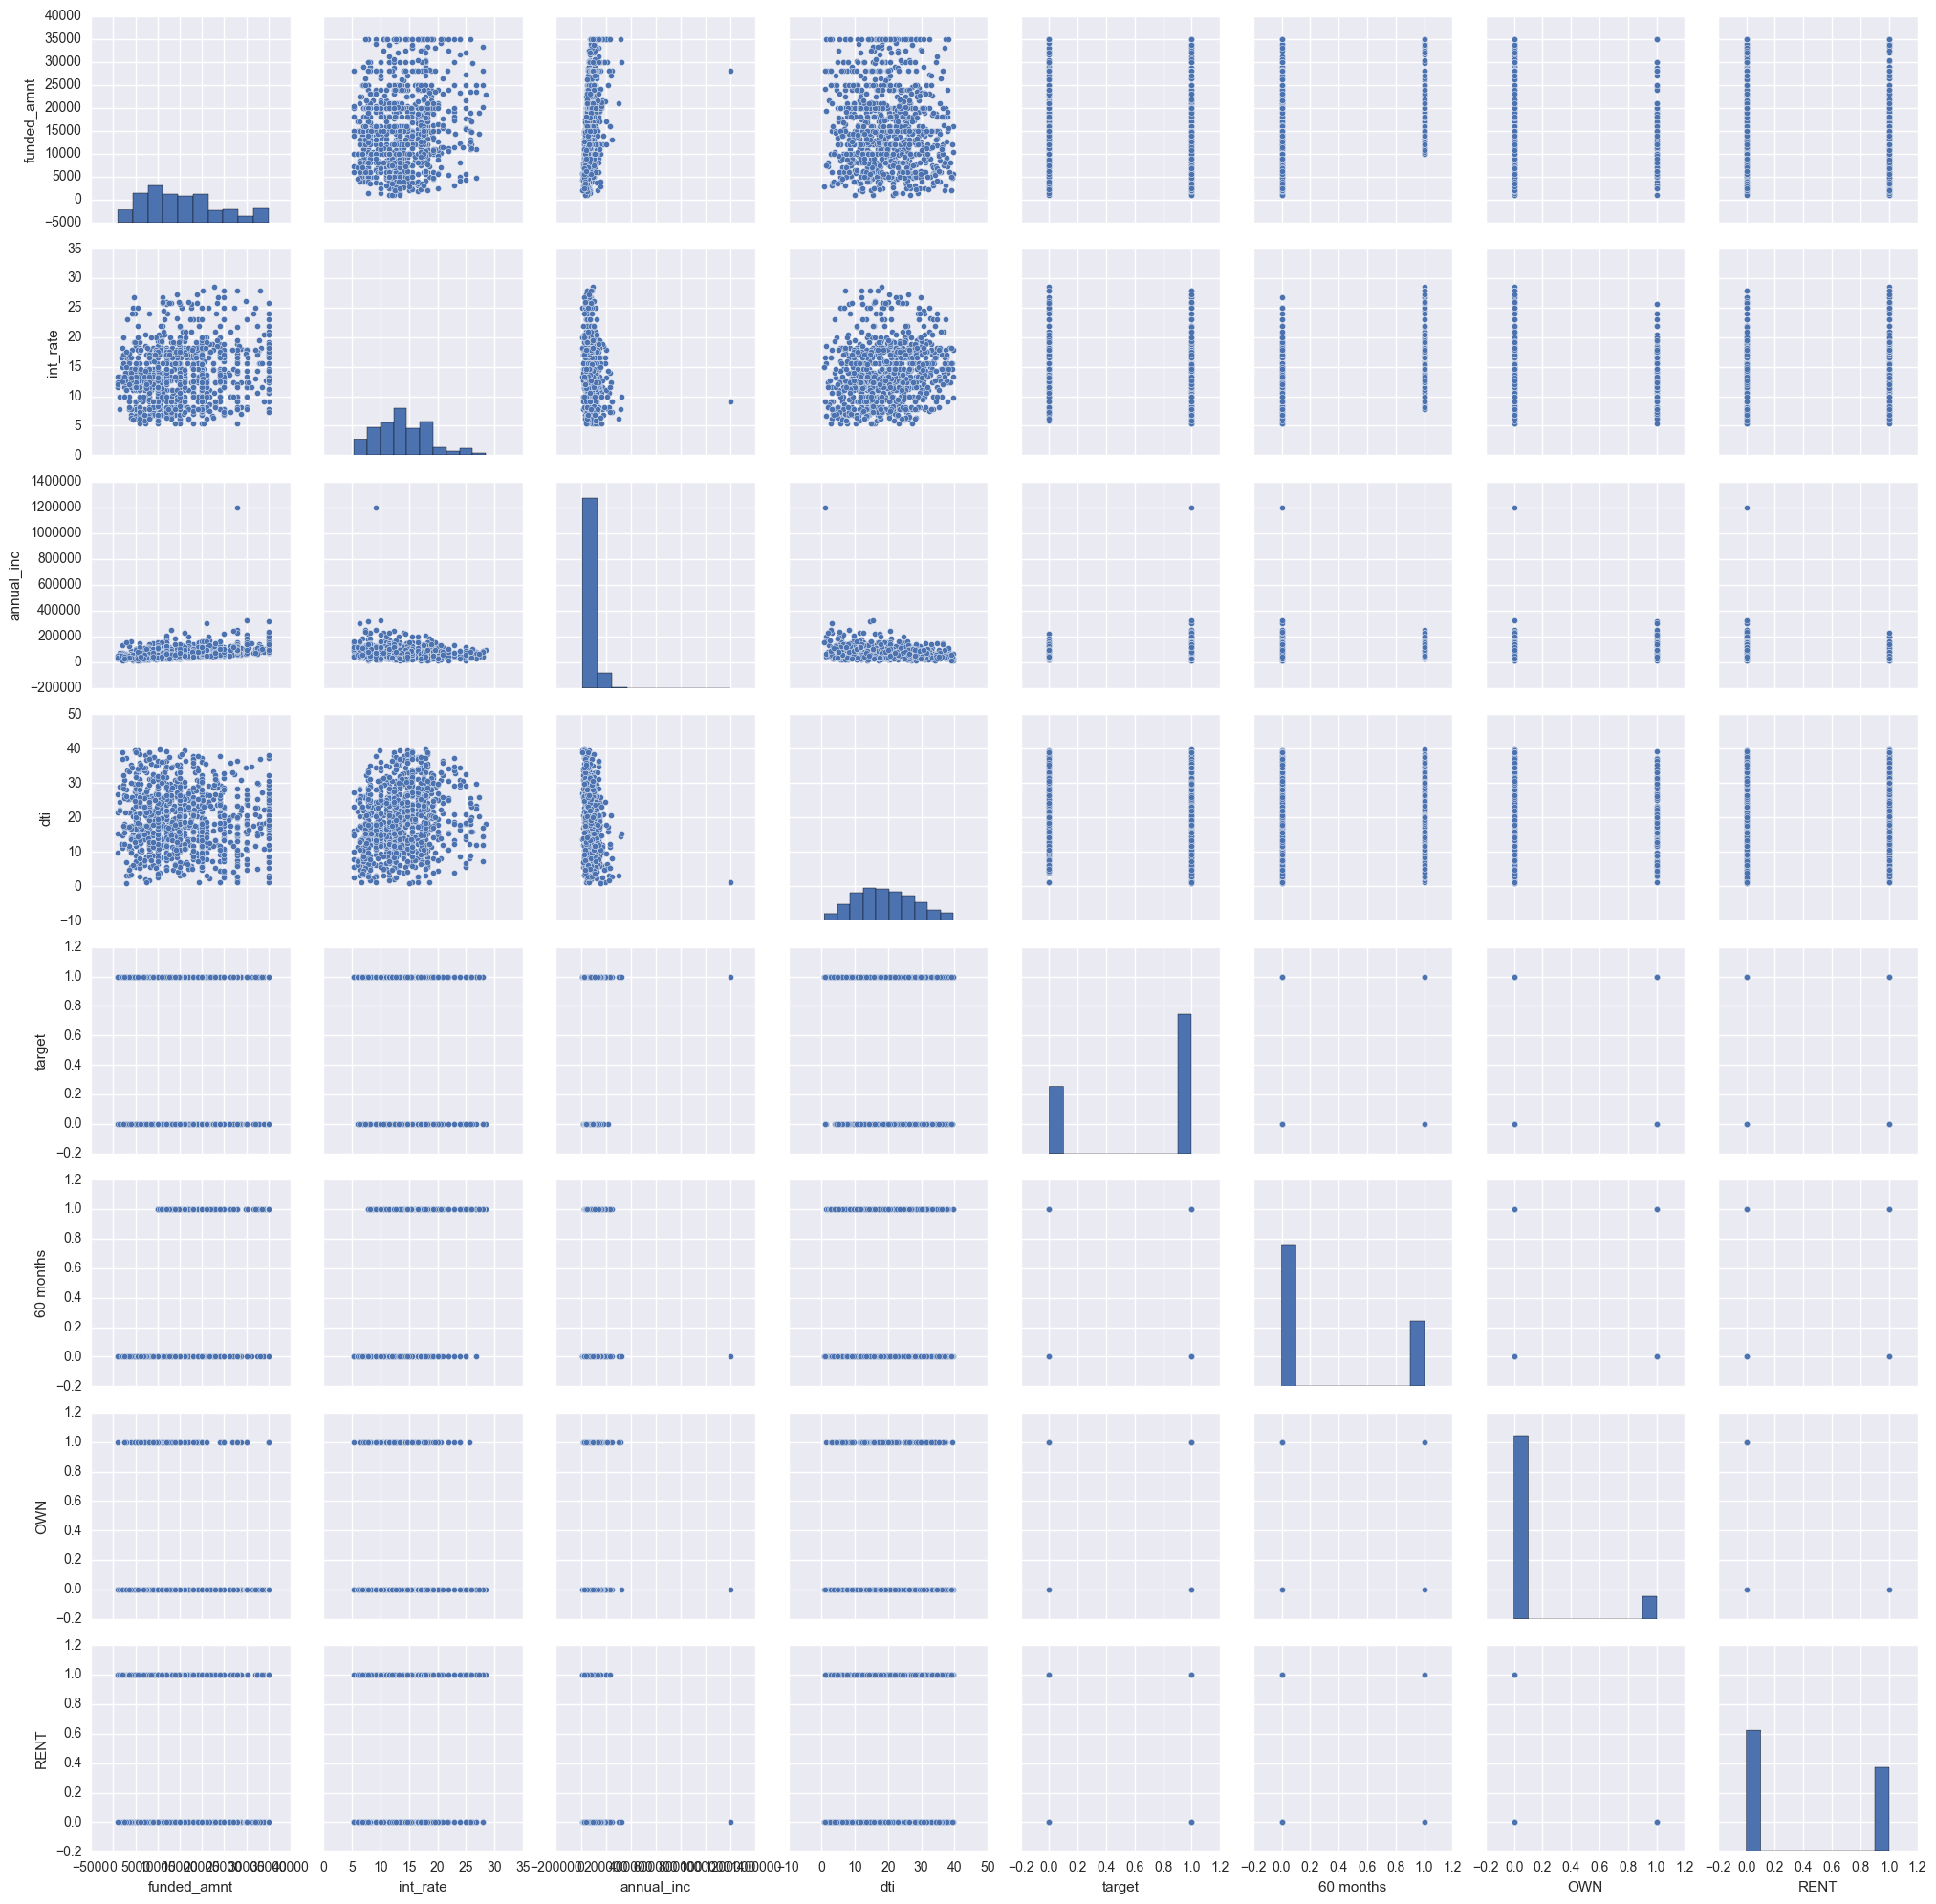

In [69]:
sns.pairplot(bb)

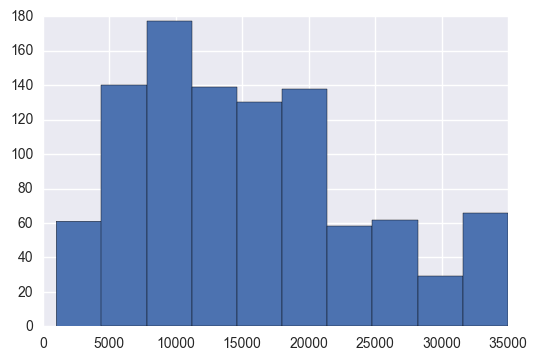

In [70]:
bb.funded_amnt.hist()

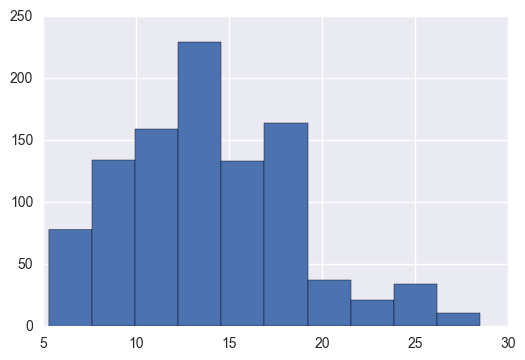

In [71]:
bb.int_rate.hist()

In [72]:
bb.head(10)

,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT
0,35000,10.49,135000.0,14.89,0,0,0,0
1,5500,13.33,12000.0,39.50,1,0,0,0
2,15975,13.33,70000.0,22.25,1,0,0,0
3,13000,9.99,61000.0,9.07,1,1,0,0
4,12000,16.55,60000.0,14.22,1,0,0,1
5,10000,13.33,60000.0,14.72,1,0,0,0
6,12000,25.99,40000.0,16.02,0,1,0,1
7,11200,7.89,60000.0,21.78,0,0,0,0
8,15000,17.57,61000.0,18.26,1,1,1,0
9,16000,9.76,65000.0,39.49,1,1,0,1


In [73]:
#Normalizing numerical variables

from sklearn.preprocessing import MinMaxScaler
y = pd.DataFrame(bb['target'], columns = ['target'])
X = bb.drop(['target'], axis = 1)
X_scaled = MinMaxScaler().fit_transform(X.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)


In [74]:
#X_scaled.head()

In [75]:

min_val = float(bb['funded_amnt'].min())
max_val = float(bb['funded_amnt'].max())

def min_max(x):
    return (x-min_val)/(max_val-min_val)
bb['funded_amnt_standardized'] = bb['funded_amnt'].apply(lambda x: min_max(x))
bb

minimum_int_rate = float(bb['int_rate'].min())
maximum_int_rate = float(bb['int_rate'].max())

def min_max(x):
    return (x-minimum_int_rate)/(maximum_int_rate-minimum_int_rate)
bb['intest_rate_standardized'] = bb['int_rate'].apply(lambda x: min_max(x))
bb


minimum_annual_inc = float(bb['annual_inc'].min())
maximum_annual_inc = float(bb['annual_inc'].max())

def min_max(x):
    return (x-minimum_annual_inc)/(maximum_annual_inc-minimum_annual_inc)
bb['annual_inc_standardized'] = bb['annual_inc'].apply(lambda x: min_max(x))
bb

minimum_dti = float(bb['dti'].min())
maximum_dti = float(bb['dti'].max())

def min_max(x):
    return (x-minimum_dti)/(maximum_dti-minimum_dti)
bb['dti_standardized'] = bb['dti'].apply(lambda x: min_max(x))
bb





,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT,funded_amnt_standardized,intest_rate_standardized,annual_inc_standardized,dti_standardized
0,35000,10.49,135000.0,14.89,0,0,0,0,1.000000,0.223133,0.103535,0.361576
1,5500,13.33,12000.0,39.50,1,0,0,0,0.132353,0.345706,0.000000,0.995364
2,15975,13.33,70000.0,22.25,1,0,0,0,0.440441,0.345706,0.048822,0.551120
3,13000,9.99,61000.0,9.07,1,1,0,0,0.352941,0.201554,0.041246,0.211692
4,12000,16.55,60000.0,14.22,1,0,0,1,0.323529,0.484678,0.040404,0.344321
5,10000,13.33,60000.0,14.72,1,0,0,0,0.264706,0.345706,0.040404,0.357198
6,12000,25.99,40000.0,16.02,0,1,0,1,0.323529,0.892102,0.023569,0.390677
7,11200,7.89,60000.0,21.78,0,0,0,0,0.300000,0.110919,0.040404,0.539016
8,15000,17.57,61000.0,18.26,1,1,1,0,0.411765,0.528701,0.041246,0.448365
9,16000,9.76,65000.0,39.49,1,1,0,1,0.441176,0.191627,0.044613,0.995107


In [76]:
del bb['funded_amnt']
del bb['int_rate']  
del bb['annual_inc']
del bb['dti']                  


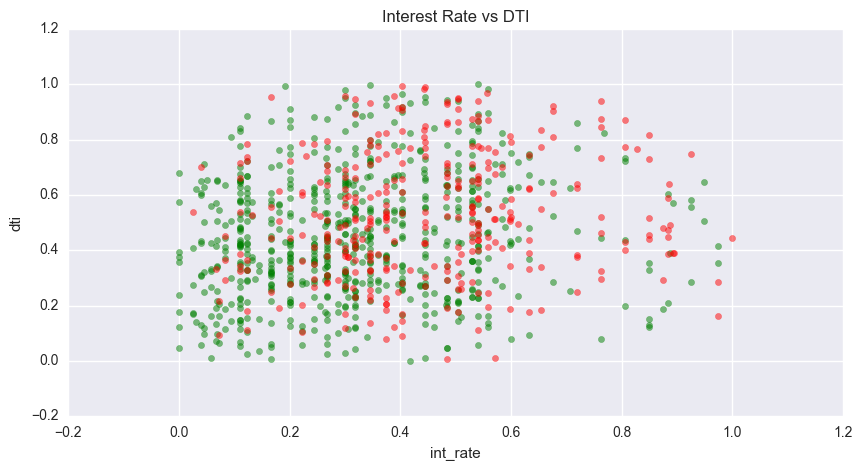

In [77]:
# plot of Interest Rate vs DTI
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.int_rate[good], X_scaled.dti[good], alpha=0.5, color='g')
ax.scatter(X_scaled.int_rate[bad], X_scaled.dti[bad], alpha=0.5, color='r')
ax.set_title("Interest Rate vs DTI")
ax.set_xlabel("int_rate")
ax.set_ylabel("dti")
plt.show()

In [78]:
print bb.to_csv('bb.csv',header=None,index=False)

bb_clean_noheaders = pd.read_csv('bb.csv', header=None)

bb_clean_noheaders.head(10)

None


,0,1,2,3,4,5,6,7
0,0,0,0,0,1.000000,0.223133,0.103535,0.361576
1,1,0,0,0,0.132353,0.345706,0.000000,0.995364
2,1,0,0,0,0.440441,0.345706,0.048822,0.551120
3,1,1,0,0,0.352941,0.201554,0.041246,0.211692
4,1,0,0,1,0.323529,0.484678,0.040404,0.344321
5,1,0,0,0,0.264706,0.345706,0.040404,0.357198
6,0,1,0,1,0.323529,0.892102,0.023569,0.390677
7,0,0,0,0,0.300000,0.110919,0.040404,0.539016
8,1,1,1,0,0.411765,0.528701,0.041246,0.448365
9,1,1,0,1,0.441176,0.191627,0.044613,0.995107


In [79]:
sig = lambda x: 1./(1+np.exp(-x))
def lnpred(data, a):
    pairedsum = a[0] + a[1]*data[1] + a[2]*data[2]+ a[3]*data[3] + a[4]*data[4] + a[5]*data[5] \
    + a[6]*data[6] + a[7]*data[7]
    if data[0] == 1:
        return np.log(sig(pairedsum))
    else:
        return np.log(1-sig(pairedsum))

In [80]:
def lnprob(a,data):
    A2 = np.sum([e**2 for e in a])
    return -0.5*A2 + np.sum([lnpred(e,a) for e in data])



In [81]:
blah = lambda a: lnprob(a, bb.values)

In [82]:
import emcee
nwalkers = 20
ndim = 8
p0 = np.random.rand(nwalkers*ndim).reshape((nwalkers,ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, blah)
pos, prob, state = sampler.run_mcmc(p0, 500)
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 500)
samples = sampler.flatchain

In [83]:
def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

prediction = float(MonteCarlo(lambda x: 1/(1+np.exp(-(x[0] + x[1]*bb.ix[0][0] + x[2]*bb.ix[0][1] + \
          x[3]*bb.ix[0][2] + x[4]*bb.ix[0][3] + x[5]*bb.ix[0][4] \
            + x[6]*bb.ix[0][5] + x[7]*bb.ix[0][6]))), samples))




In [84]:
prediction

0.5251956672896448

In [ ]:
"""def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

omega0 = float(MonteCarlo(lambda x: x[0], samples))
omega1 = float(MonteCarlo(lambda x: x[1], samples))
omega2 = float(MonteCarlo(lambda x: x[2], samples))
omega3 = float(MonteCarlo(lambda x: x[3], samples))
omega4 = MonteCarlo(lambda x: x[4], samples)
omega5 = MonteCarlo(lambda x: x[5], samples)
omega6 = MonteCarlo(lambda x: x[6], samples)
lam = MonteCarlo(lambda x: x[7], samples)


print ('o0 = {0},\no1 = {1},\no2 = {2},\no3 = {3},\no4 = {4},\no5 = {5},\no6 = {6},\n \
1= {7}'.format(omega0, omega1, omega2, omega3, omega4, omega5, omega6,lam))


def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

print ('o0 = {0},\no1 = {1},\no2 = {2},\no3 = {3},\no4 = {4},\no5 = {5},\no6 = {6},\n \
1= {7}'.format(omega0, omega1, omega2, omega3, omega4, omega5, omega6,lam))

lil_percent = 1/(1+np.exp(-(lam + omega0*bb.ix[0][0] + omega1*bb.ix[0][1] + \
          omega2*bb.ix[0][2] + omega3*bb.ix[0][3] + omega4*bb.ix[0][4] \
            + omega5*bb.ix[0][5] + omega6*bb.ix[0][6])))"""


